In [10]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from math import gcd
from fractions import Fraction
from qiskit.visualization import plot_histogram
from numpy.random import randint
import pandas as pd
from qiskit.quantum_info import Statevector
print("Imports Successful")

Imports Successful
Imports Successful


In [11]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [12]:

def test_cycles(circuit, cycles):
    i = 1
    for application in range(cycles):
        print("Apply %s, %i times: %i" % (circuit.name, application, i))
        sv = Statevector.from_int(i, 32)  # 32 is no. of elements in vector (dimension)
        sv = sv.evolve(circuit)
        output = sv.sample_memory(1)[0]  # simulate one shot (circuit is deterministic)
        i = int(output, 2)  # convert binary output to int

def test_inputs(circuit, inputs, N=1):
    for inp in inputs:
        sv = Statevector.from_int(inp, 32)  # 32 is no. of elements in vector (dimension)
        sv = sv.evolve(circuit)
        output = sv.sample_memory(1)[0]  # simulate one shot (circuit is deterministic)
        out = int(output, 2)  # convert binary output to int
        print(f"{circuit.name}: {inp} -> {out}, real {(2*inp) % N}")


Apply 2x (mod 15), 0 times: 1
Apply 2x (mod 15), 1 times: 2
Apply 2x (mod 15), 2 times: 4
Apply 2x (mod 15), 3 times: 8
Apply 2x (mod 15), 4 times: 1
Apply 2x (mod 15), 5 times: 2


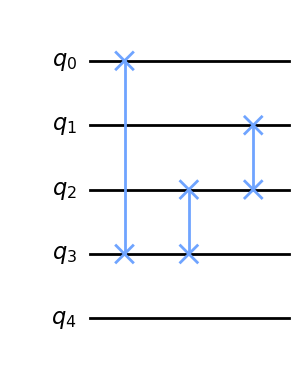

Apply 2x (mod 15), 0 times: 1
Apply 2x (mod 15), 1 times: 2
Apply 2x (mod 15), 2 times: 4
Apply 2x (mod 15), 3 times: 8
Apply 2x (mod 15), 4 times: 1
Apply 2x (mod 15), 5 times: 2


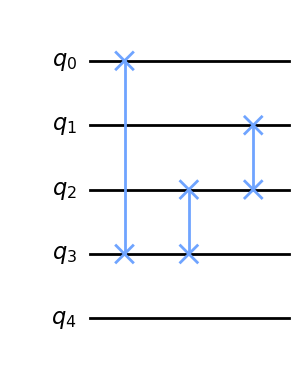

In [13]:

tm15 = QuantumCircuit(5)  # 2x mod 15
tm15.name = "2x (mod 15)"
tm15.swap(0, 3)
tm15.swap(3, 2)
tm15.swap(2, 1)

test_cycles(tm15, 6)
tm15.draw('mpl')

Apply 2x (mod 31), 0 times: 1
Apply 2x (mod 31), 1 times: 2
Apply 2x (mod 31), 2 times: 4
Apply 2x (mod 31), 3 times: 8
Apply 2x (mod 31), 4 times: 16
Apply 2x (mod 31), 5 times: 1
2x (mod 31): 0 -> 0, real 0
2x (mod 31): 1 -> 2, real 2
2x (mod 31): 2 -> 4, real 4
2x (mod 31): 3 -> 6, real 6
2x (mod 31): 4 -> 8, real 8
2x (mod 31): 5 -> 10, real 10
2x (mod 31): 6 -> 12, real 12
2x (mod 31): 7 -> 14, real 14
2x (mod 31): 8 -> 16, real 16
2x (mod 31): 9 -> 18, real 18
2x (mod 31): 10 -> 20, real 20
2x (mod 31): 11 -> 22, real 22
2x (mod 31): 12 -> 24, real 24
2x (mod 31): 13 -> 26, real 26
2x (mod 31): 14 -> 28, real 28
2x (mod 31): 15 -> 30, real 30
2x (mod 31): 16 -> 1, real 1
2x (mod 31): 17 -> 3, real 3
2x (mod 31): 18 -> 5, real 5
2x (mod 31): 19 -> 7, real 7
2x (mod 31): 20 -> 9, real 9
2x (mod 31): 21 -> 11, real 11
2x (mod 31): 22 -> 13, real 13
2x (mod 31): 23 -> 15, real 15
2x (mod 31): 24 -> 17, real 17
2x (mod 31): 25 -> 19, real 19
2x (mod 31): 26 -> 21, real 21
2x (mod 31):

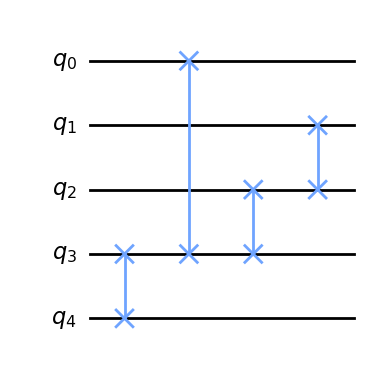

Apply 2x (mod 31), 0 times: 1
Apply 2x (mod 31), 1 times: 2
Apply 2x (mod 31), 2 times: 4
Apply 2x (mod 31), 3 times: 8
Apply 2x (mod 31), 4 times: 16
Apply 2x (mod 31), 5 times: 1
2x (mod 31): 0 -> 0, real 0
2x (mod 31): 1 -> 2, real 2
2x (mod 31): 2 -> 4, real 4
2x (mod 31): 3 -> 6, real 6
2x (mod 31): 4 -> 8, real 8
2x (mod 31): 5 -> 10, real 10
2x (mod 31): 6 -> 12, real 12
2x (mod 31): 7 -> 14, real 14
2x (mod 31): 8 -> 16, real 16
2x (mod 31): 9 -> 18, real 18
2x (mod 31): 10 -> 20, real 20
2x (mod 31): 11 -> 22, real 22
2x (mod 31): 12 -> 24, real 24
2x (mod 31): 13 -> 26, real 26
2x (mod 31): 14 -> 28, real 28
2x (mod 31): 15 -> 30, real 30
2x (mod 31): 16 -> 1, real 1
2x (mod 31): 17 -> 3, real 3
2x (mod 31): 18 -> 5, real 5
2x (mod 31): 19 -> 7, real 7
2x (mod 31): 20 -> 9, real 9
2x (mod 31): 21 -> 11, real 11
2x (mod 31): 22 -> 13, real 13
2x (mod 31): 23 -> 15, real 15
2x (mod 31): 24 -> 17, real 17
2x (mod 31): 25 -> 19, real 19
2x (mod 31): 26 -> 21, real 21
2x (mod 31):

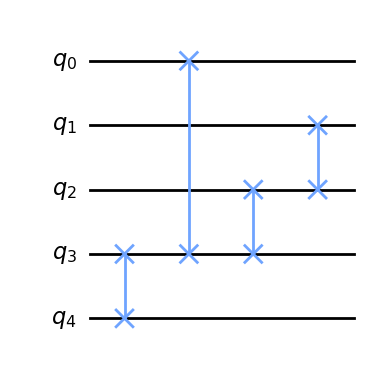

In [14]:
tm31 = QuantumCircuit(5)
tm31.name = "2x (mod 31)"
tm31.swap(3, 4)
tm31 = tm31.compose(tm15)

test_cycles(tm31, 6)
test_inputs(tm31, range(32), N=31)
tm31.draw('mpl')

Apply 2x (mod 21), 0 times: 1
Apply 2x (mod 21), 1 times: 2
Apply 2x (mod 21), 2 times: 4
Apply 2x (mod 21), 3 times: 8
Apply 2x (mod 21), 4 times: 16
Apply 2x (mod 21), 5 times: 11
Apply 2x (mod 21), 6 times: 1
Apply 2x (mod 21), 7 times: 2
Apply 2x (mod 21), 8 times: 4
Apply 2x (mod 21), 9 times: 8
Apply 2x (mod 21), 10 times: 16
Apply 2x (mod 21), 11 times: 11
Apply 2x (mod 21), 12 times: 1
Apply 2x (mod 21), 13 times: 2
Apply 2x (mod 21), 14 times: 4
Apply 2x (mod 21), 15 times: 8
Apply 2x (mod 21), 16 times: 16
Apply 2x (mod 21), 17 times: 11
Apply 2x (mod 21), 18 times: 1
Apply 2x (mod 21), 19 times: 2
Apply 2x (mod 21), 20 times: 4
2x (mod 21): 0 -> 0, real 0
2x (mod 21): 1 -> 2, real 2
2x (mod 21): 2 -> 4, real 4
2x (mod 21): 3 -> 10, real 6
2x (mod 21): 4 -> 8, real 8
2x (mod 21): 5 -> 6, real 10
2x (mod 21): 6 -> 12, real 12
2x (mod 21): 7 -> 14, real 14
2x (mod 21): 8 -> 16, real 16
2x (mod 21): 9 -> 9, real 18
2x (mod 21): 10 -> 20, real 20
2x (mod 21): 11 -> 1, real 1
2x (

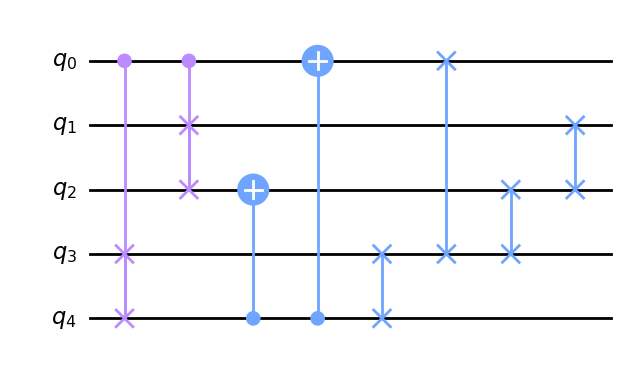

In [20]:
tm21 = QuantumCircuit(5)
tm21.name = "2x (mod 21)"
tm21.cswap(0,3,4)
tm21.cswap(0,1,2)
tm21.cx(4, 2)
tm21.cx(4, 0)
tm21 = tm21.compose(tm31)

test_cycles(tm21, 21)
test_inputs(tm21, range(32), N=21)
tm21.draw('mpl')

Apply 4x (mod 21), 0 times: 1
Apply 4x (mod 21), 1 times: 4
Apply 4x (mod 21), 2 times: 16
Apply 4x (mod 21), 3 times: 1
Apply 4x (mod 21), 4 times: 4
Apply 4x (mod 21), 5 times: 16
Apply 4x (mod 21), 6 times: 1
Apply 4x (mod 21), 7 times: 4
Apply 4x (mod 21), 8 times: 16
Apply 4x (mod 21), 9 times: 1
Apply 4x (mod 21), 10 times: 4
Apply 4x (mod 21), 11 times: 16
Apply 4x (mod 21), 12 times: 1
Apply 4x (mod 21), 13 times: 4
Apply 4x (mod 21), 14 times: 16
Apply 4x (mod 21), 15 times: 1
Apply 4x (mod 21), 16 times: 4
Apply 4x (mod 21), 17 times: 16
Apply 4x (mod 21), 18 times: 1
Apply 4x (mod 21), 19 times: 4
Apply 4x (mod 21), 20 times: 16
4x (mod 21): 0 -> 0, real 0
4x (mod 21): 1 -> 4, real 2
4x (mod 21): 2 -> 2, real 4
4x (mod 21): 3 -> 6, real 6
4x (mod 21): 4 -> 16, real 8
4x (mod 21): 5 -> 20, real 10
4x (mod 21): 6 -> 18, real 12
4x (mod 21): 7 -> 22, real 14
4x (mod 21): 8 -> 8, real 16
4x (mod 21): 9 -> 12, real 18
4x (mod 21): 10 -> 10, real 20
4x (mod 21): 11 -> 14, real 1
4

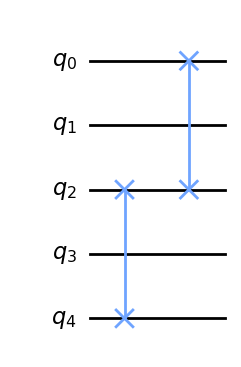

In [22]:
fm21 = QuantumCircuit(5)
fm21.name = "4x (mod 21)"
fm21.swap(2, 4)
fm21.swap(0, 2)

test_cycles(fm21, 21)
test_inputs(fm21, range(32), N=21)
fm21.draw('mpl')


In [36]:
def c_4mod21(power, draw=False):
    """Controlled multiplication by 4 mod 21"""
    U = QuantumCircuit(3)
    if power % 3 == 1:
        U.swap(1, 2)
        U.swap(0, 1)
    elif power % 3 == 2:
        U.swap(0, 1)
        U.swap(1, 2)

    U = U.to_gate()
    U.name = f"{4**power} mod 21"

    c_U = U.control()
    return c_U

In [16]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)

    # print(f"{a}^{power} mod 15 \n", U)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"

    c_U = U.control()
    return c_U

In [47]:
def qpe_4mod21():
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 4
    qc = QuantumCircuit(3+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_4mod21(2**q),
                 [q] + [i+N_COUNT for i in range(3)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # qc.draw("mpl")
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    # print(qc)
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [1]:
N=21
a = 4
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_4mod21() # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:


NameError: name 'qpe_4mod21' is not defined

In [17]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    qc.draw("mpl")
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    print(qc)
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [18]:
N=15
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
      ┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼─────